In [ ]:
!pip install --upgrade albumentations
!git clone https://github.com/frgfm/torch-cam.git
!pip install -e torch-cam/.

fatal: destination path 'torch-cam' already exists and is not an empty directory.
Obtaining file:///content/torch-cam
  Attempting uninstall: torchcam
    Found existing installation: torchcam 0.3.2.dev0+c1b1103
    Can't uninstall 'torchcam'. No files were found to uninstall.
  Running setup.py develop for torchcam


In [2]:
import albumentations
from albumentations.pytorch import ToTensorV2

In [3]:
! git clone https://github.com/eva7wandb/Weights_Heist_Flow.git

fatal: destination path 'Weights_Heist_Flow' already exists and is not an empty directory.


In [4]:
%cd /content/Weights_Heist_Flow

/content/Weights_Heist_Flow


In [5]:
!pwd

/content/Weights_Heist_Flow


In [6]:
from main import Trainer, show_misclassification
from models import resnet

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


In [16]:
trainer = Trainer(
    resnet.ResNet18()
)

[INFO] Loading Data


/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:691: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
[INFO] train dataset of size 50000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32] 

In [17]:
trainer.train_model(epochs=4)

[INFO] Begin training for 4 epochs


TRAIN Epoch:0 Loss:1.3733 Batch:390 Acc:46.39: 100%|██████████| 391/391 [02:23<00:00,  2.72it/s]


TEST         Loss:0.0092         Acc:58.49         [5849 / 10000]


TRAIN Epoch:1 Loss:1.0822 Batch:390 Acc:63.59: 100%|██████████| 391/391 [02:24<00:00,  2.71it/s]


TEST         Loss:0.0074         Acc:67.03         [6703 / 10000]


TRAIN Epoch:2 Loss:0.6845 Batch:390 Acc:71.05: 100%|██████████| 391/391 [02:23<00:00,  2.72it/s]


TEST         Loss:0.0066         Acc:71.92         [7192 / 10000]


TRAIN Epoch:3 Loss:0.575 Batch:390 Acc:75.00: 100%|██████████| 391/391 [02:24<00:00,  2.71it/s]


TEST         Loss:0.0065         Acc:72.68         [7268 / 10000]


[INFO] device :  cuda


Generating sample predictions: 79it [00:09,  7.90it/s]


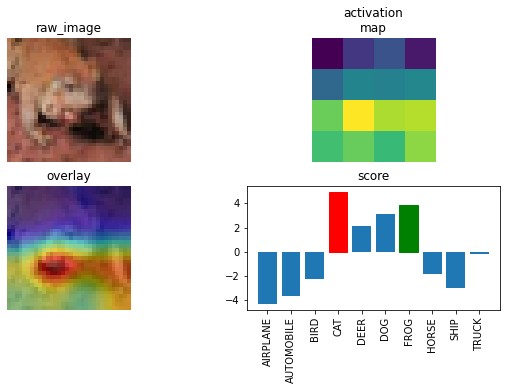

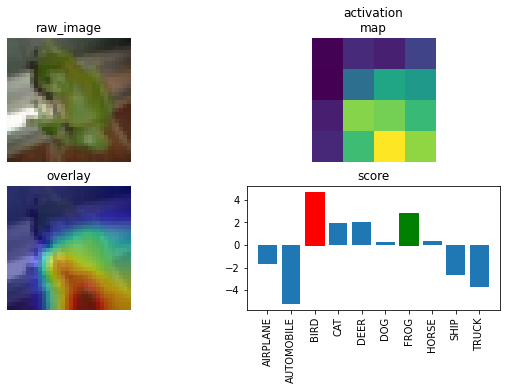

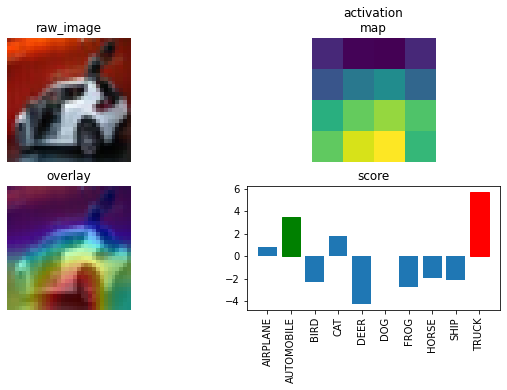

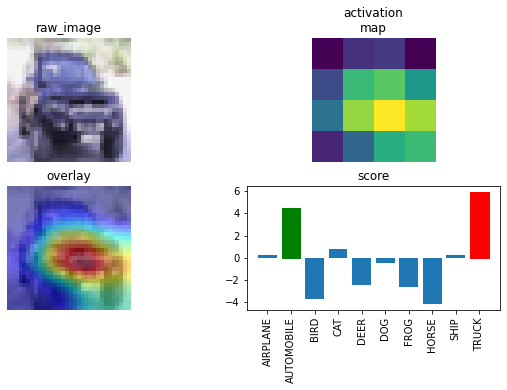

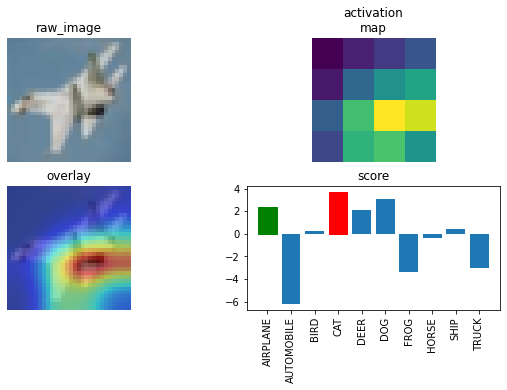

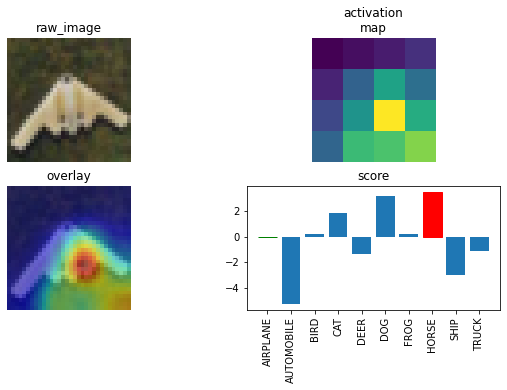

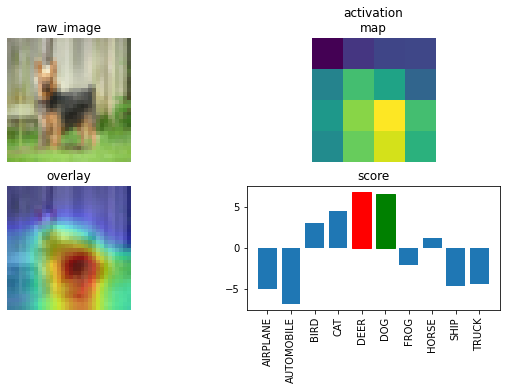

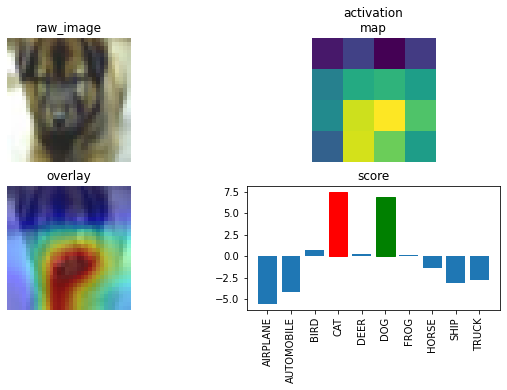

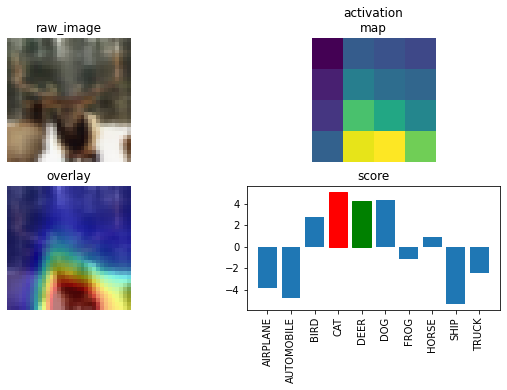

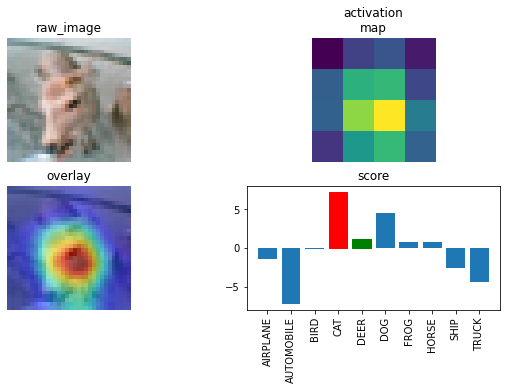

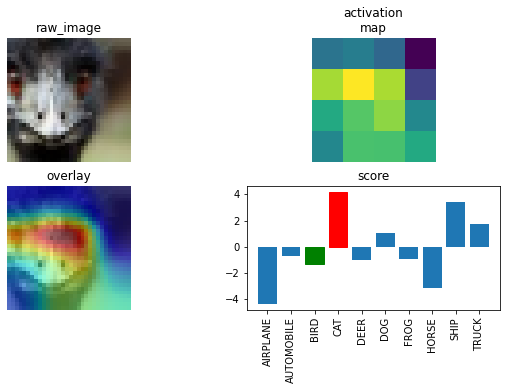

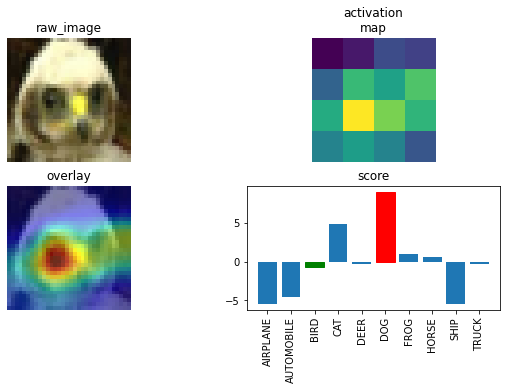

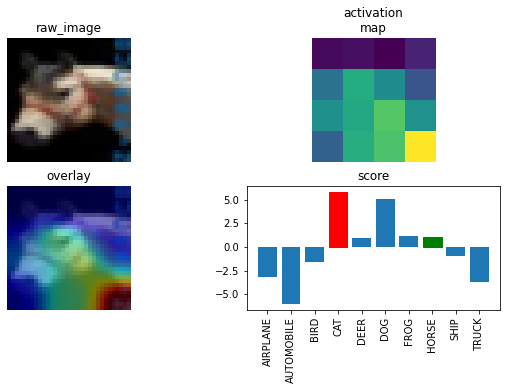

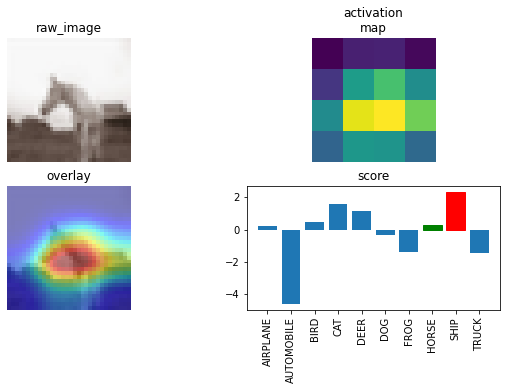

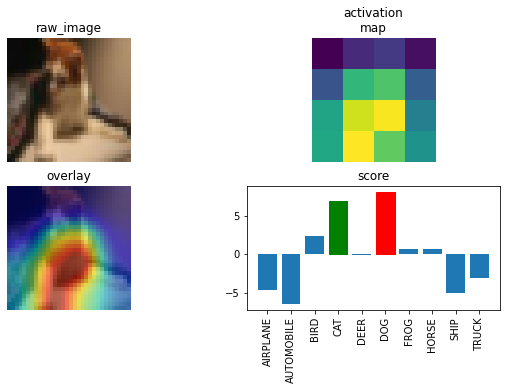

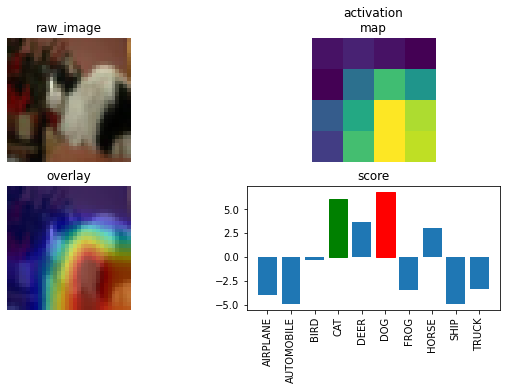

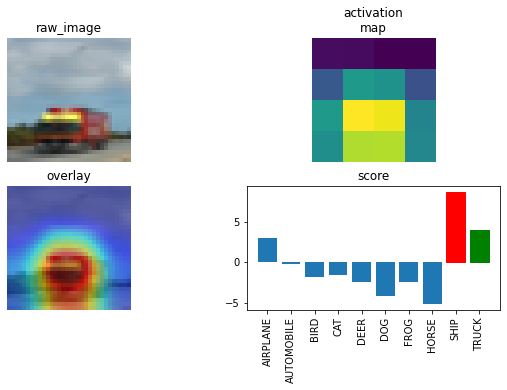

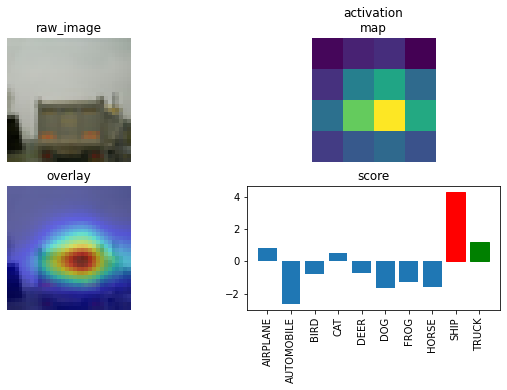

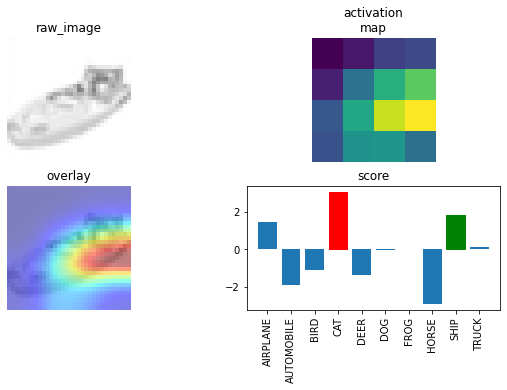

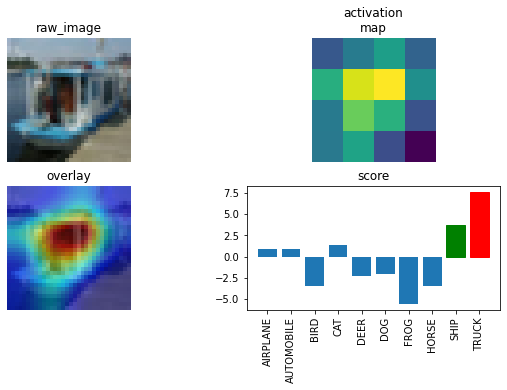

In [18]:
show_misclassification(trainer)